In [ ]:
from sympy import *
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
from scipy import signal
from IPython.display import display, Latex
from sympy.physics.vector import vlatex, dynamicsymbols

In [ ]:
def printEquations(n, L, P, q, dq, t):
    L = simplify(L)
    display(Latex("${} = {}$".format(latex("L"), vlatex(L))))
    expr = []
    ddtheta = []

    for i in range(n):
      expr.append(diff(L, q[i]) + diff(P, dq[i]) - diff(diff(L, dq[i]),t))
      print("\n")
      expr[i] = Eq(simplify(expr[i]), 0)
      display(Latex(vlatex(expr[i])))
      ddtheta.append(diff(dq[i], t))
    
    ddtheta = tuple(ddtheta)
    solutions = list(list(linsolve(expr, ddtheta))[0])
    for i in range(n):
      solution = Eq(diff(dq[i], t), simplify(solutions[i]))
      print("\n")
      display(Latex(vlatex(solution)))

    return solutions


In [ ]:
t = Symbol('t')

m1 = Symbol('m_1')
m2 = Symbol('m_2')

l1 = Symbol('l_1')
l2 = Symbol('l_2')

g = Symbol('g')

M = dynamicsymbols('M')

theta1 = dynamicsymbols('theta_1')
theta2 = dynamicsymbols('theta_2')
theta3 = dynamicsymbols('theta_3')

omega1 = diff(theta1, t)
omega2 = diff(theta2, t)
omega3 = diff(theta3, t)

x2 = l1 * cos(theta1) + l2 * cos(theta3) / 2
y2 = l1 * sin(theta1) + l2 * sin(theta3) / 2

vx2 = diff(x2, t)
vy2 = diff(y2, t)

T = m1 * l1 ** 2 * omega1 ** 2 / 6 + m2 * l2 ** 2 * (omega3) ** 2 / 24 + m2 * (vx2 ** 2 + vy2 ** 2) / 2
U = m1 * g * l1 * sin(theta1) / 2 + m2 * g * y2
L = T - U


P = M * omega1

original_equations = printEquations(2, L, P, [theta1, theta3], [omega1, omega3], t)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
def makeEquations(n, mass1, mass2, length1, length2, gravity, dq, equations):
  res = []
  for i in range(n):
    expr = equations[i]

    expr = expr.subs(m1, mass1)
    expr = expr.subs(m2, mass2)

    expr = expr.subs(l1,length1)
    expr = expr.subs(l2, length2)

    expr = expr.subs(g, gravity)

    expr = simplify(expr)
    sol = Eq(diff(dq[i], t), expr)
    display(Latex(vlatex(sol)))
    print("\n")

    res.append(expr)

  return res
    

In [ ]:
mass1 = 1
mass2 = 2

length1 = 1
length2 = 0.5
gravity = 9.81

equations = makeEquations(2, mass1, mass2, length1, length2, gravity, [omega1, omega3], original_equations)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
theta1_0 = pi/4
theta3_0 = -pi

omega1_0 = 0
omega3_0 = 0

In [ ]:
f1 = lambdify([theta1, theta3, omega1, omega3, M], equations[0])
f2 = lambdify([theta1, theta3, omega1, omega3, M], equations[1])

In [ ]:
def odes(t, y, M, f1, f2):
  q1 = y[0]
  dq1 = y[1]
  q2 = y[2]
  dq2 = y[3]

  moment = M(t)

  return [dq1, f1(q1, q2, dq1, dq2, moment), dq2, f2(q1, q2, dq1, dq2, moment)]

In [ ]:
Ma = 1
omega = 1
M1 = lambdify([t], Ma * cos(omega * t))

tspan = np.linspace(0, 10, 1000000)
sol = solve_ivp(fun = lambda t, y: odes(t, y, M1, f1, f2), t_span = [tspan[0], tspan[-1]], y0 = [theta1_0, omega1_0, theta3_0, omega3_0], t_eval = tspan)

In [ ]:
theta1_analytical = sol.y[0]
omega1_analytical = sol.y[1]
theta2_analytical = sol.y[2] - sol.y[0]
omega2_analytical = sol.y[3] - sol.y[1]

Text(0, 0.5, '$\\theta_1$')

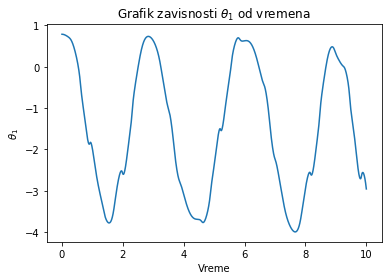

In [ ]:
plt.plot(sol.t, theta1_analytical)
plt.title(r"Grafik zavisnosti $\theta_1$ od vremena")
plt.xlabel("Vreme")
plt.ylabel(r"$\theta_1$")

Text(0, 0.5, '$\\theta_2$')

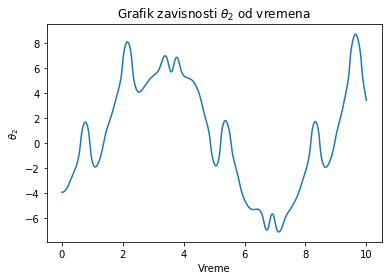

In [ ]:
plt.plot(sol.t, theta2_analytical)
plt.title(r"Grafik zavisnosti $\theta_2$ od vremena")
plt.xlabel("Vreme")
plt.ylabel(r"$\theta_2$")

Text(0, 0.5, 'Ugaona brzina donjeg štapa')

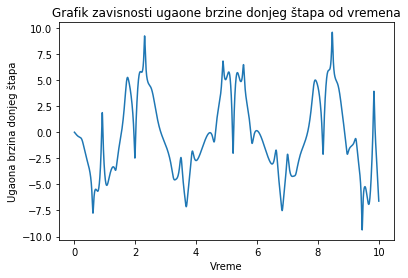

In [ ]:
plt.plot(sol.t, omega1_analytical)
plt.title("Grafik zavisnosti ugaone brzine donjeg štapa od vremena")
plt.xlabel("Vreme")
plt.ylabel("Ugaona brzina donjeg štapa")

Text(0, 0.5, 'Ugaona brzina gornjeg štapa')

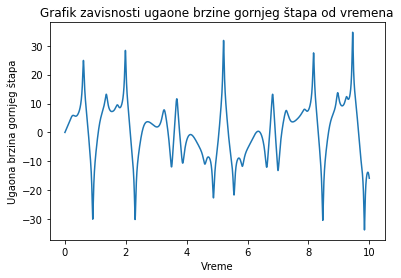

In [ ]:
plt.plot(sol.t, omega2_analytical)
plt.title("Grafik zavisnosti ugaone brzine gornjeg štapa od vremena")
plt.xlabel("Vreme")
plt.ylabel("Ugaona brzina gornjeg štapa")

Text(0.5, 1.0, 'Trajektorija vrha gornjeg štapa')

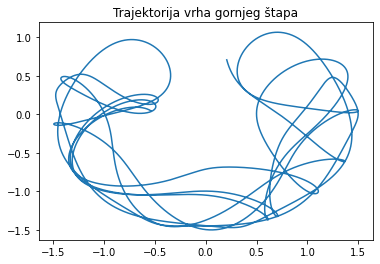

In [ ]:
x = length1 * np.cos(theta1_analytical) + length2 * np.cos(theta2_analytical + theta1_analytical)
y = length1 * np.sin(theta1_analytical) + length2 * np.sin(theta2_analytical + theta1_analytical)

plt.plot(x, y)
plt.title("Trajektorija vrha gornjeg štapa")